# Ensemble: pr/prra/prsn/evspsbl/tas/tos  (over sea-ice and ocean)

## Imports & defaults

In [1]:
import libs.local
import libs.plot
import libs.vars
import matplotlib

matplotlib.rcParams.update({ 'font.size': 18 })

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Data

In [2]:
# ----- SPECIFIC SETTINGS -----
component = 'Amon'
experiment = 'ssp585'
variable_id = 'pr'

conf = [v for v in libs.vars.variables() if v['variable_id'] == variable_id][0]
time_series_text = '''total precipitation (solid), rainfall (dashed), snowfall (dashdot), 
and evaporation (dotted) over sea-ice and ocean'''

time_series_weighted_method = conf['weighting_method']
time_series_units = conf['units']
time_series_y_label = f'Precipitation ({time_series_units})'
time_series_y_range = (0, 2.25)
time_series_y_range_monthly = (0, 3)
time_series_process = lambda x: x

In [3]:
ensemble_pr_time_series = time_series_process(
    libs.local.get_ensemble_series(variable_id, experiment)
)
ensemble_pr_time_series_smooth = time_series_process(
    libs.local.get_ensemble_series(variable_id, experiment, suffix='_smooth')
)

# ----- prra -----
ensemble_prra_time_series = time_series_process(
    libs.local.get_ensemble_series('prra', experiment)
)
ensemble_prra_time_series_smooth = time_series_process(
    libs.local.get_ensemble_series('prra', experiment, suffix='_smooth')
)
for variable in ensemble_prra_time_series:
    ensemble_prra_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashed' }
    ensemble_prra_time_series_smooth[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashed' }

# ----- prsn -----
ensemble_prsn_time_series = time_series_process(
    libs.local.get_ensemble_series('prsn', experiment)
)
ensemble_prsn_time_series_smooth = time_series_process(
    libs.local.get_ensemble_series('prsn', experiment, suffix='_smooth')
)
for variable in ensemble_prsn_time_series:
    ensemble_prsn_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }
    ensemble_prsn_time_series_smooth[variable].attrs['plot_kwargs'] = { 'linestyle': 'dashdot' }

# ----- tas -----
ensemble_tas_time_series = time_series_process(
    libs.local.get_ensemble_series('tas', experiment)
)
ensemble_tas_time_series_smooth = time_series_process(
    libs.local.get_ensemble_series('tas', experiment, suffix='_smooth')
)
ensemble_tas_time_series /= 10

# ----- evspsbl -----
ensemble_evspsbl_time_series = time_series_process(
    libs.local.get_ensemble_series('evspsbl', experiment)
)
ensemble_evspsbl_time_series_smooth = time_series_process(
    libs.local.get_ensemble_series('evspsbl', experiment, suffix='_smooth')
)

for variable in ensemble_evspsbl_time_series:
    ensemble_evspsbl_time_series[variable].attrs['plot_kwargs'] = { 'linestyle': 'dotted' }
    ensemble_evspsbl_time_series_smooth[variable].attrs['plot_kwargs'] = { 'linestyle': 'dotted' }


time_slices = libs.vars.default_time_slices()

## Time series

### Mean

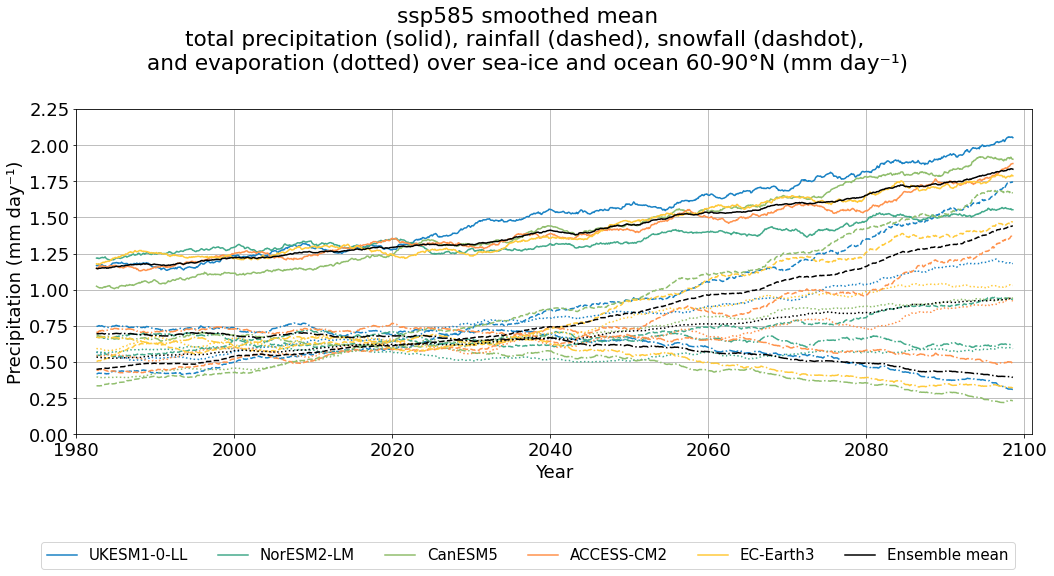

In [4]:
libs.plot.time_series_from_vars(
    [
        ensemble_pr_time_series_smooth,
        ensemble_prsn_time_series_smooth,
        ensemble_prra_time_series_smooth,
        ensemble_evspsbl_time_series_smooth
    ],
    title=f'{experiment} smoothed mean\n{time_series_text} 60-90°N ({time_series_units})',
    xattr='time',
    ylabel=time_series_y_label,
    yrange=time_series_y_range
)

## Monthly variability

### Full region (time)

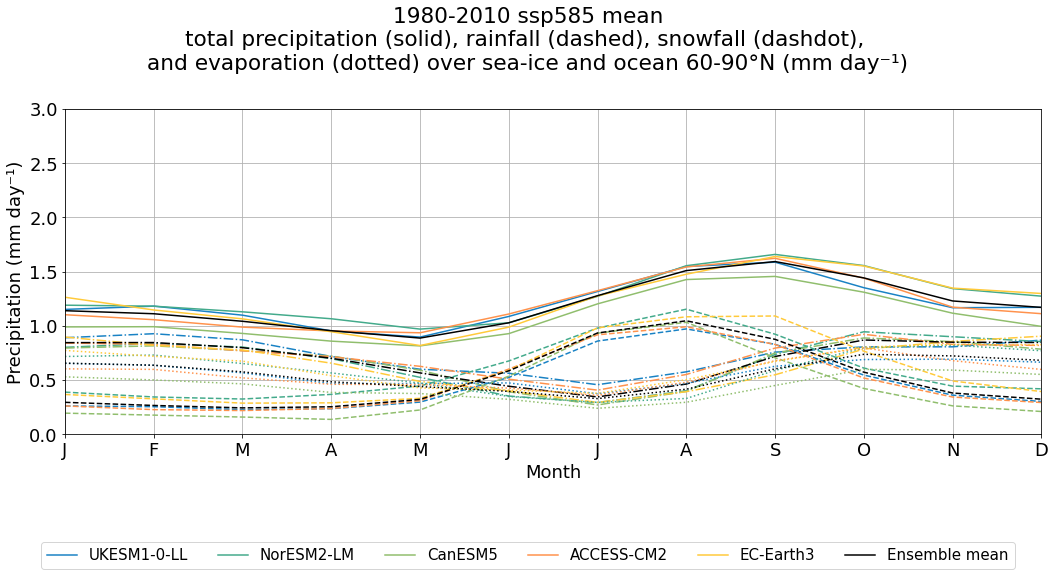

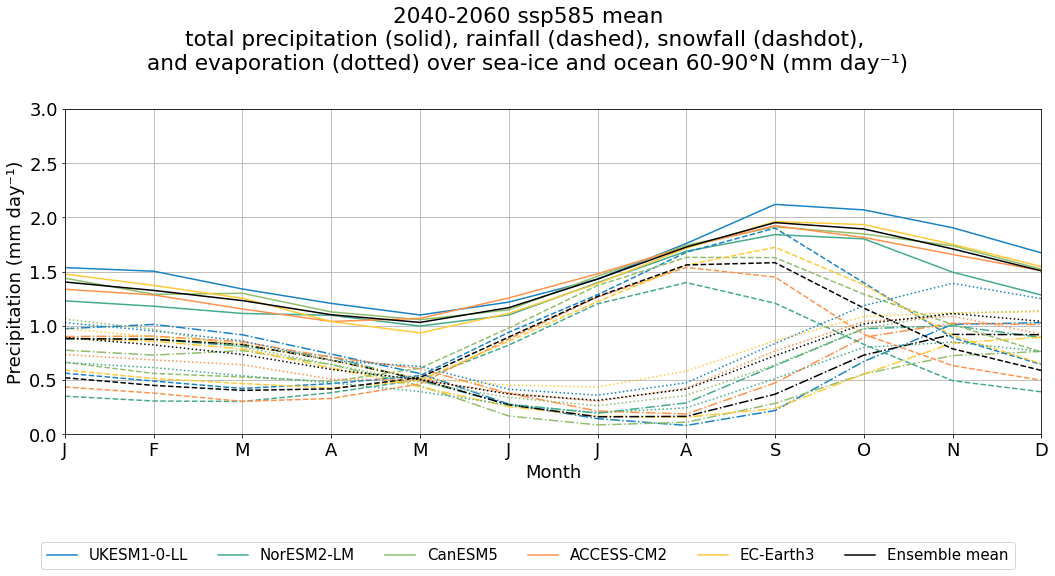

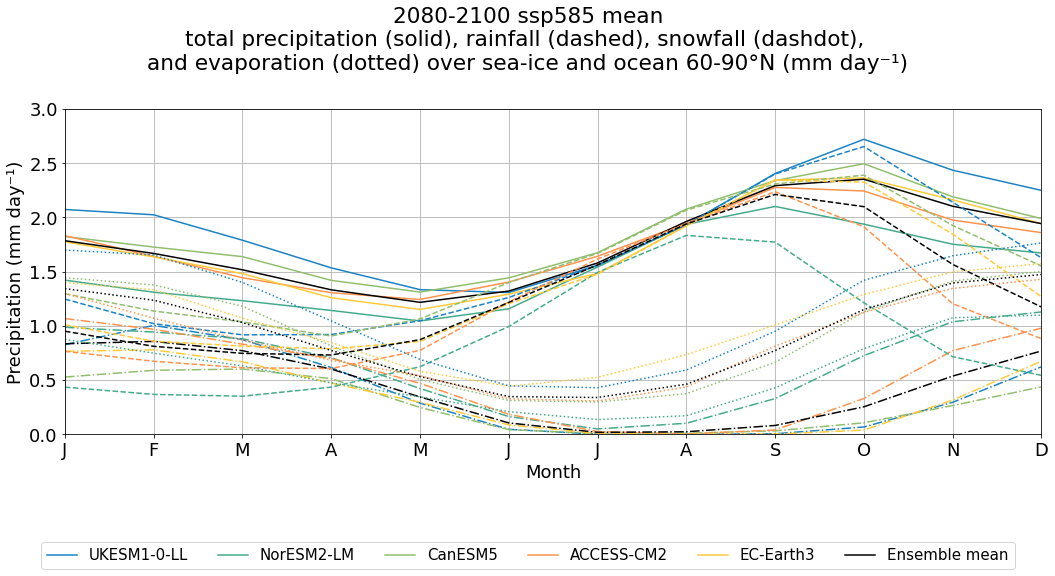

In [5]:
for s in time_slices:
    s_label = s['label']

    libs.plot.monthly_variability(
        [
            ensemble_pr_time_series.sel(**s['slice']).groupby('time.month').mean('time'),
            ensemble_prsn_time_series.sel(**s['slice']).groupby('time.month').mean('time'),
            ensemble_prra_time_series.sel(**s['slice']).groupby('time.month').mean('time'),
            ensemble_evspsbl_time_series.sel(**s['slice']).groupby('time.month').mean('time'),
        ],
        title=f'{s_label} {experiment} mean\n{time_series_text} 60-90°N ({time_series_units})',
        ylabel=time_series_y_label,
        yrange=time_series_y_range_monthly
    )

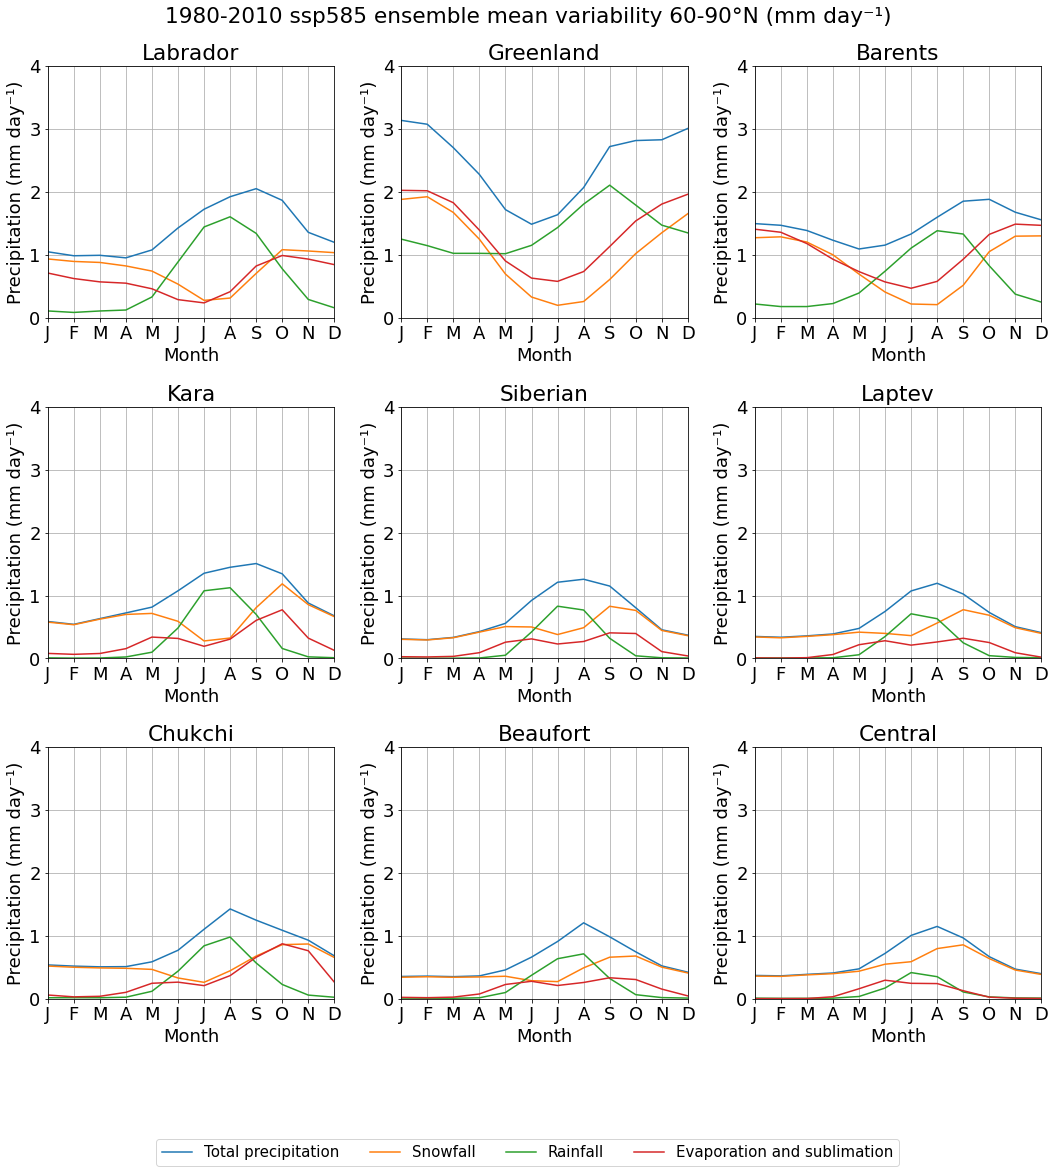

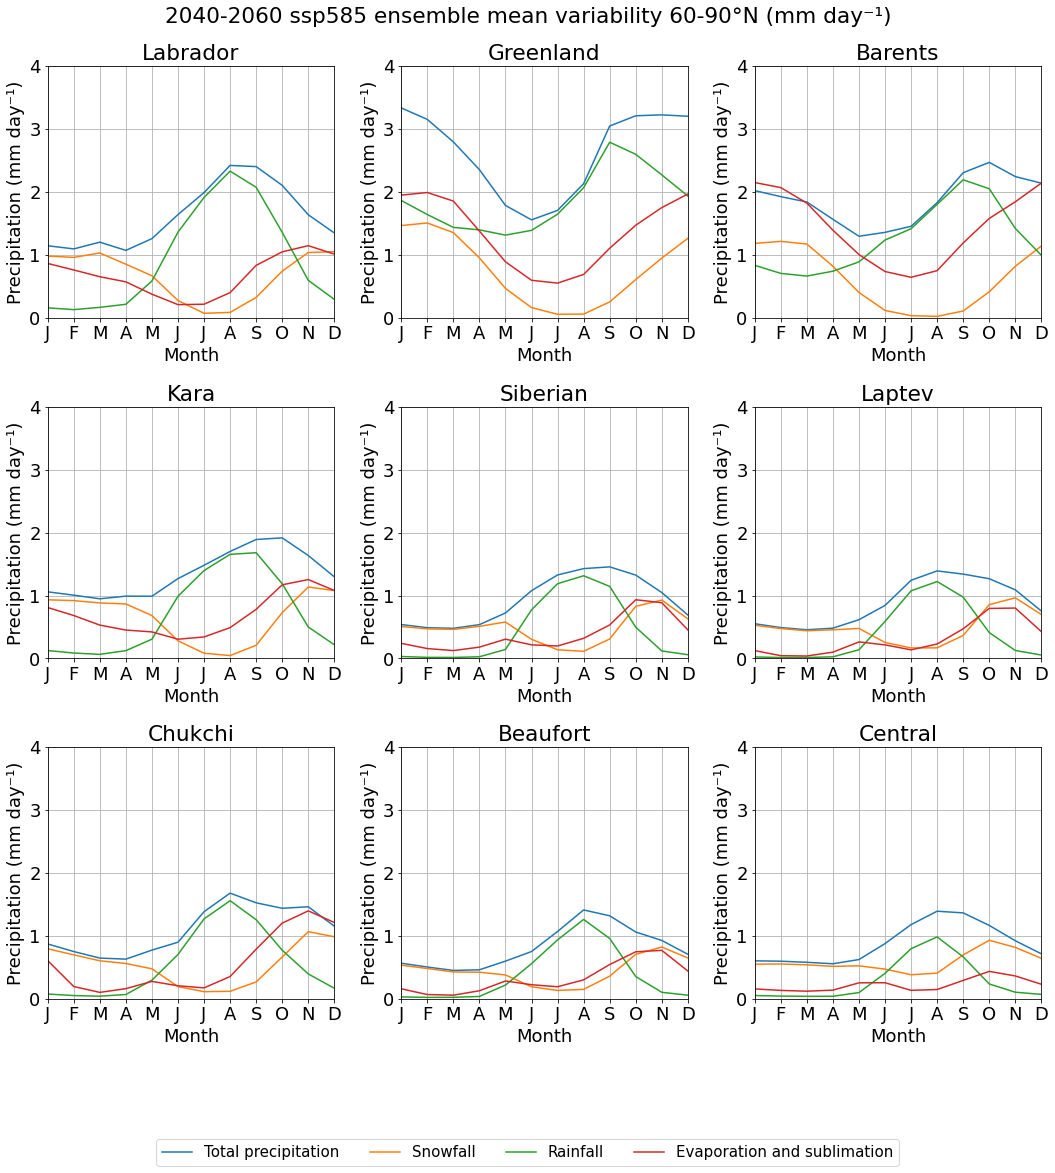

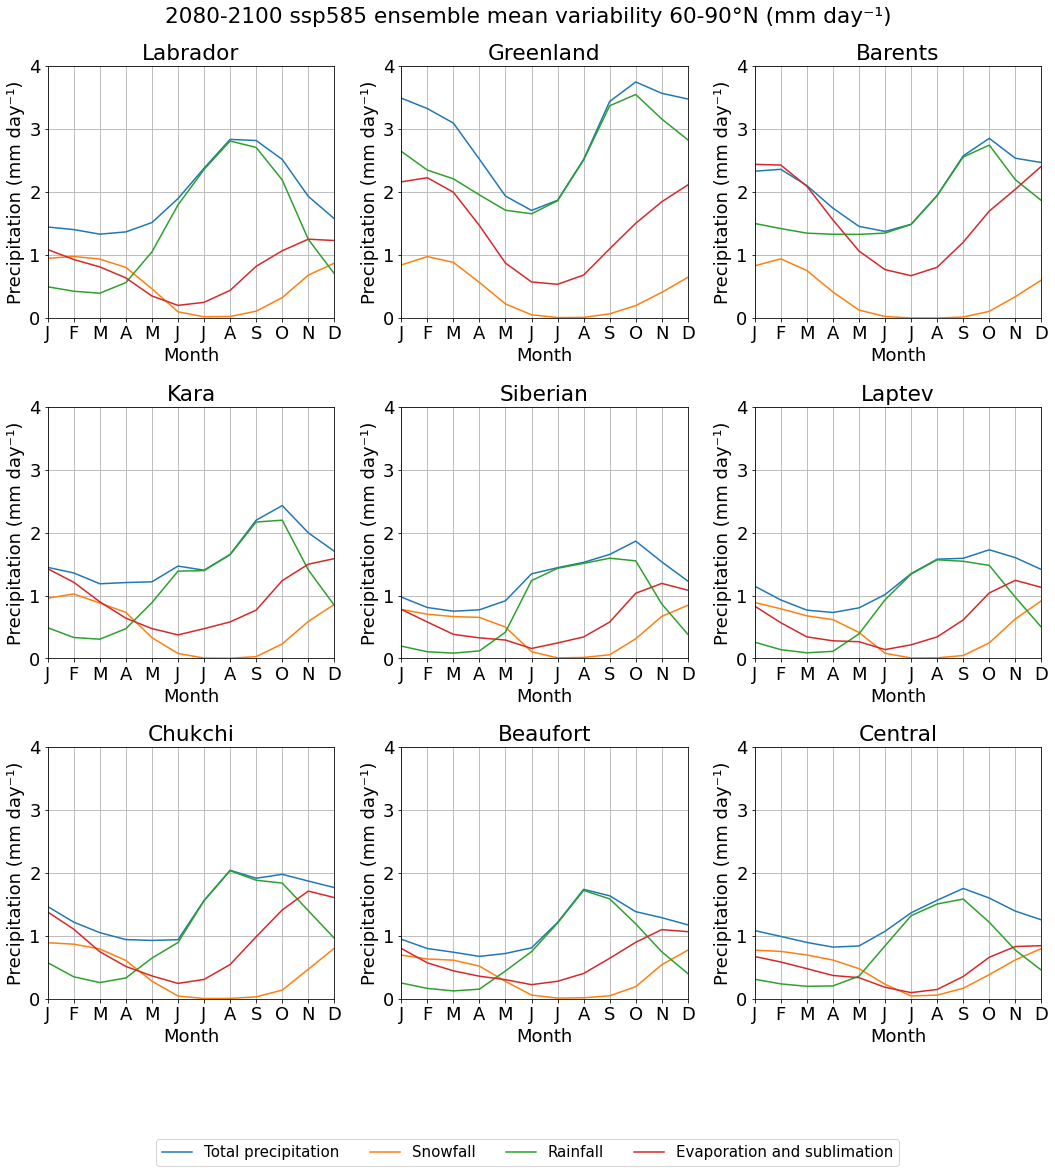

In [6]:
regions_pr = libs.local.get_ensemble_regional_series('pr', experiment)
regions_prra = libs.local.get_ensemble_regional_series('prra', experiment)
regions_prsn = libs.local.get_ensemble_regional_series('prsn', experiment)
regions_evspsbl = libs.local.get_ensemble_regional_series('evspsbl', experiment)

for s in time_slices:
    s_label = s['label']
    arr = []
    for i, data_prra in enumerate(regions_prra):
        data_pr_slice = regions_pr[i].sel(**s['slice']).groupby('time.month').mean('time')
        data_pr_slice['Ensemble mean'].attrs['label'] = 'Total precipitation'
        del data_pr_slice['Ensemble mean'].attrs['color']
        
        data_prsn_slice = regions_prsn[i].sel(**s['slice']).groupby('time.month').mean('time')
        data_prsn_slice['Ensemble mean'].attrs['label'] = 'Snowfall'
        del data_prsn_slice['Ensemble mean'].attrs['color']
        
        data_prra_slice = data_prra.sel(**s['slice']).groupby('time.month').mean('time')
        data_prra_slice['Ensemble mean'].attrs['label'] = 'Rainfall'
        del data_prra_slice['Ensemble mean'].attrs['color']

        #data_siconc_slice = regions_siconc[i].sel(**s['slice']).groupby('time.month').mean('time')
        #data_siconc_slice /= 1e7
        #data_siconc_slice['Ensemble mean'].attrs['label'] = 'Sea-ice area (/1e7)'
        #del data_siconc_slice['Ensemble mean'].attrs['color']

        data_evspsbl_slice = regions_evspsbl[i].sel(**s['slice']).groupby('time.month').mean('time')
        data_evspsbl_slice['Ensemble mean'].attrs['label'] = 'Evaporation and sublimation'
        del data_evspsbl_slice['Ensemble mean'].attrs['color']

        arr.append([
            data_pr_slice,
            data_prsn_slice,
            data_prra_slice,
            data_evspsbl_slice
        ])

    libs.plot.monthly_variability_regional(
        arr,
        legend_below=True,
        title=f'{s_label} {experiment} ensemble mean variability 60-90°N ({time_series_units})',
        variables=['Ensemble mean'],
        ylabel=time_series_y_label,
        yrange=(0, 4)
    )